In [17]:
from __future__ import division
import os
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from catalyst.api import record, symbols, order_target_percent
from catalyst.utils.run_algo import run_algorithm

In [2]:
import pandas as pd
from ccxt_market_data import get_market_data, create_ETH_BTC, create_ETH_ETH
data_path = './data/'

list_currencies = ['ETH/BTC', 'ETH/USDT', 'KNC/ETH', 'ELF/ETH', 'BAT/ETH', 'MANA/ETH', 'ZRX/ETH', 'BNT/ETH',
                   'LINK/ETH', 'SNT/ETH', 'REP/ETH', 'ENJ/ETH', 'LEND/ETH', 'LRC/ETH', 'RLC/ETH', 'POWR/ETH'
                  ]


for symbol in list_currencies:
    get_market_data(symbol=symbol, 
                    exchange_='binance', 
                    timeframe='1d', 
                    save=True, 
                    data_path=data_path)
    
create_ETH_BTC(data_path)
create_ETH_ETH(data_path)

In [5]:
from pycoingecko import CoinGeckoAPI
import datetime
import pandas as pd

def get_market_data_coingecko(symbol, _id):
    cg = CoinGeckoAPI()

    data = cg.get_coin_market_chart_by_id(_id, 'eth', 500)

    dates = [datetime.datetime.fromtimestamp(data['prices'][i][0] / 1000).strftime('%Y-%m-%d') for i in range(len(data['prices']))]
    price  = [data['prices'][i][1] for i in range(len(data['prices']))]

    df_data = {'Open': price, 'Timestamp' : dates} 
    df = pd.DataFrame(df_data)
    cols = ['Timestamp', 'Open']
    df = df[cols]
    
    df.drop(df.tail(1).index,inplace=True)

    df.to_csv(data_path + 'coingecko-{}-1d.csv'.format(symbol), index=False)
    
list_currencies = [['POLY_ETH', 'polymath-network'],
                   ['REQ_ETH', 'request-network'],
                   ['RDN_ETH', 'raiden-network'],
                   ['RCN_ETH', 'ripio-credit-network'],
                   ['MKR_ETH', 'maker'],
                   ['ANT_ETH', 'aragon'],
                   ['PNK_ETH', 'kleros'],
                   ['GNO_ETH', 'gnosis'],
                   ['GEN_ETH', 'daostack'],
                   ['MLN_ETH', 'melon'],
                   ['UBT_ETH', 'unibright'],
                   ['NMR_ETH', 'numeraire'],
                   ['LPT_ETH', 'livepeer'],
                   ['XBASE_ETH', 'eterbase'],
                   ['COT_ETH', 'cotrader'],
                   ['AMN_ETH', 'amon'],
                   ['MET_ETH', 'metal'],
                   ['BLT_ETH', 'bloom'],
                   ['SNX_ETH', 'havven'],
                   ['TKN_ETH', 'tokencard'],
                   ['LOC_ETH', 'lockchain'],
                   ['REN_ETH', 'republic-protocol'],
                   ['BTU_ETH', 'btu-protocol']
#                    ['KIN_ETH', 'kin'],
#                    ['BAND_ETH', 'band-protocol'],
#                    ['MATIC_ETH', 'matic-network'],
                  ]

for currency in list_currencies:
    get_market_data_coingecko(currency[0], currency[1])

In [6]:
list_pairs_optim_binance = ['ETH_ETH', 'BTC_ETH', 'KNC_ETH', 'ELF_ETH',
                            'BAT_ETH', 'MANA_ETH', 'ZRX_ETH', 'BNT_ETH',  
                            'LINK_ETH', 'SNT_ETH', 'REP_ETH', 'ENJ_ETH',
                            'LEND_ETH', 'LRC_ETH', 'RLC_ETH', 'POWR_ETH']

list_pairs_optim_coingecko = ['POLY_ETH', 'REQ_ETH', 'RDN_ETH', 'RCN_ETH', 
                              'MKR_ETH', 'ANT_ETH', 'PNK_ETH', 'GNO_ETH', 
                              'GEN_ETH', 'MLN_ETH', 'UBT_ETH', 'NMR_ETH', 
                              'LPT_ETH', 'XBASE_ETH', 'COT_ETH', 'AMN_ETH', 
                              'MET_ETH', 'BLT_ETH', 'SNX_ETH', 'TKN_ETH', 
                              'LOC_ETH', 'REN_ETH', 'BTU_ETH'
                             ]

timeframe = '1d'

def create_portfolio(df, list_pairs: list, exchange: str, timeframe: str):
    '''
    This function is aimed to gather all pairs in a single dataframe. this is our portfolio
    '''
    for pair in list_pairs:
        filename = '{}-{}-{}.csv'.format(exchange, pair,timeframe)
        pair_data = pd.read_csv(data_path + filename)
        pair_data = pair_data.set_index('Timestamp')
        pair_data = pd.DataFrame(pair_data['Open']) 
        pair_data.columns = [pair]
        
        if pair == 'BTU_ETH':
            pair_data.loc['2019-08-12'] = 0.001644947
            pair_data = pair_data.sort_index()

        df = pd.concat([df, pair_data], axis=1)

    return df

df = pd.DataFrame()
df = create_portfolio(df, list_pairs=list_pairs_optim_binance,
                exchange='binance',
                timeframe=timeframe,
                )

df = create_portfolio(df, list_pairs=list_pairs_optim_coingecko,
                exchange='coingecko',
                timeframe=timeframe,
                )

df.to_csv(data_path + 'FullData.csv')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


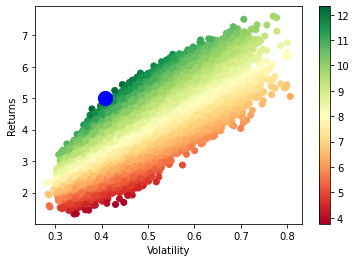

,32859
r,5.019626
stdev,0.407162
sharpe,12.328329
ETH_ETH,0.023559
BTC_ETH,0.011495
KNC_ETH,0.005301
ELF_ETH,0.015007
BAT_ETH,0.028729
MANA_ETH,0.005355
ZRX_ETH,0.031084


In [7]:
# Test Markowitz Optimization

# Set the time window that will be used to compute expected return and asset correlations
window = 28
# Set the number of days between each portfolio rebalancing
rebalance_period = 7
i = 0
nassets = len(list_pairs_optim_binance) + len(list_pairs_optim_coingecko)
df_balance = df


# Only rebalance at the beginning of the algorithm execution and
# every multiple of the rebalance period
if i == 0 or i % rebalance_period == 0:
    n = window
    prices = df_balance.fillna(method='ffill')
    # display(prices)
    pr = np.asmatrix(prices.values)
    t_prices = prices.iloc[1:n + 1]
    t_val = t_prices.values
    tminus_prices = prices.iloc[0:n]
    tminus_val = tminus_prices.values
    # Compute daily returns (r)
    r = np.asmatrix(t_val / tminus_val - 1)
    # Compute the expected returns of each asset with the average
    # daily return for the selected time window
    m = np.asmatrix(np.mean(r, axis=0))
    # ###
    stds = np.std(r, axis=0)
    # Compute excess returns matrix (xr)
    xr = r - m
    # Matrix algebra to get variance-covariance matrix
    cov_m = np.dot(np.transpose(xr), xr) / n
    # Compute asset correlation matrix (informative only)
    corr_m = cov_m / np.dot(np.transpose(stds), stds)

    # Define portfolio optimization parameters
    n_portfolios = 100000
    results_array = np.zeros((3 + nassets, n_portfolios))
    for p in range(n_portfolios):
        weights = np.random.random(nassets)
        weights /= np.sum(weights)
        w = np.asmatrix(weights)
        p_r = np.sum(np.dot(w, np.transpose(m))) * 365
        p_std = np.sqrt(np.dot(np.dot(w, cov_m),
                               np.transpose(w))) * np.sqrt(365)

        # store results in results array
        results_array[0, p] = p_r
        results_array[1, p] = p_std
        # store Sharpe Ratio (return / volatility) - risk free rate element
        # excluded for simplicity
        results_array[2, p] = results_array[0, p] / results_array[1, p]

        for i, w in enumerate(weights):
            results_array[3 + i, p] = w

    columns = ['r', 'stdev', 'sharpe'] + list_pairs_optim_binance + list_pairs_optim_coingecko
    
    # convert results array to Pandas DataFrame
    results_frame = pd.DataFrame(np.transpose(results_array),
                                 columns=columns)
    
    # locate position of portfolio with highest Sharpe Ratio
    max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
    # locate positon of portfolio with minimum standard deviation
    # min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]


    # create scatter plot coloured by Sharpe Ratio
    plt.scatter(results_frame.stdev,
                results_frame.r,
                c=results_frame.sharpe,
                cmap='RdYlGn')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()

    # plot blue circle to highlight position of portfolio
    # with highest Sharpe Ratio
    plt.scatter(max_sharpe_port[1],
                max_sharpe_port[0],
                marker='o',
                color='b',
                s=200)

    plt.show()
    display(pd.DataFrame(max_sharpe_port))

i += 1


In [9]:
print(corr_m.shape)

(39, 39)


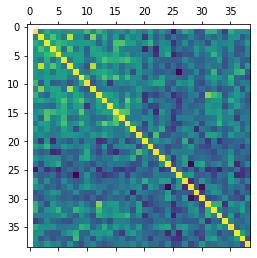

In [10]:
plt.matshow(corr_m)
plt.show()

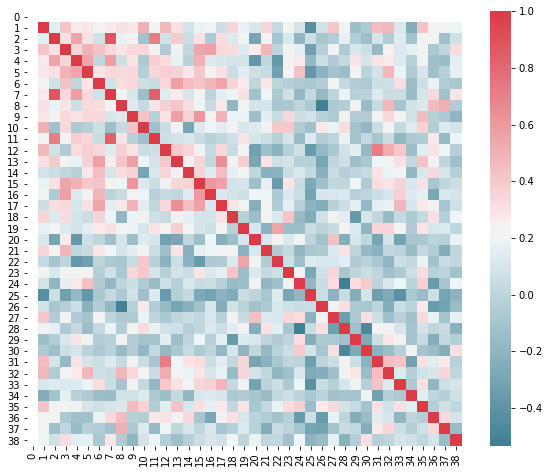

In [16]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_m, mask=np.zeros_like(corr_m, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [13]:
report = pd.DataFrame(max_sharpe_port)[3:]
report = round(100*report,2)
report

,32859
ETH_ETH,2.36
BTC_ETH,1.15
KNC_ETH,0.53
ELF_ETH,1.50
BAT_ETH,2.87
MANA_ETH,0.54
ZRX_ETH,3.11
BNT_ETH,1.18
LINK_ETH,5.03
SNT_ETH,3.54
